In [1]:
# Importar dataframe y visualizacion
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Importar Modelos Regresion Lineal, Logistica, KNN, Random Forest, Árboles decisión, Kmeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

# Importar label 
from sklearn.preprocessing import LabelEncoder

# Importar GridSearch para optimización 
from sklearn.model_selection import GridSearchCV

# Importar Metricas
from sklearn.metrics import classification_report
from sklearn import metrics

# Ignorar errores
import warnings
warnings.filterwarnings('ignore')

In [2]:
filename = "OnlineRetail.csv"
df = pd.read_csv(filename,encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


# Información y descripción de la data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Limpiando datos

* Para los datos nulos de la columna **Descriptions** se cambiaran los valores nulos por la descripcion correspondiente al mismo **StockCode**, es decir, todos los StockCode = **85123A** deberán tener de descripción **WHITE HANGING HEART T-LIGHT HOLDER**


* Para los datos nulos de la columna **CustomerID** se remplazaran los valores nulos por el promedio correspondiente al **InvoiceNo**, es decir, todos los InvoiceNo = **536365** deberán tener un CustomerID **17850.0** 


**- En caso de que no se puedan rellenar todo los datos utilizando esta forma, el resto de los datos se eliminar del dataframe.** 

**- Estos codigos pueden demorarse harto rato.**

* Posterior a esto, se deben eliminar de la data todo los datos duplicados que existan. 

In [5]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.duplicated().sum()

5268

In [7]:
df[df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,01-12-2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,01-12-2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,01-12-2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,01-12-2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,01-12-2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,09-12-2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,09-12-2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,09-12-2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,09-12-2011 10:26,10.79,NaN,United Kingdom


In [ ]:
def Upgrade_Item_Identifier_mean(InvoiceNo):
    Customer_ID_filter  = df['InvoiceNo'] == InvoiceNo
    values_mean = df[Customer_ID_filter]['CustomerID'].mean()
    return values_mean

In [ ]:
Customer_ID_filter_isna = df['CustomerID'].isna()

In [ ]:
df.loc[Customer_ID_filter_isna , 'CustomerID'] = df.apply(lambda x:Upgrade_Item_Identifier_mean( x['InvoiceNo']) ,axis=1 )
df[Customer_ID_filter_isna]

In [ ]:
dicc={}

for i in df.index:
    if pd.isnull(df['Description'][i]):
        x = df['StockCode'][i]
        dicc[x]=''
print(dicc)


In [ ]:
for sc in dicc:
    for e in range(0, len(df['StockCode'])):
        if sc == df['StockCode'][e] and pd.notnull(df['Description'][e]):
            dicc[sc]=df['Description'][e]
print(dicc)


In [ ]:
for u in df.index:
    if pd.isnull(df['Description'][u]):
        for sc in dicc:
            if sc == df['StockCode'][u] and dicc[sc]!="":
                df['Description'][u] = dicc[sc]


In [8]:
df[df["InvoiceNo"]=="581498"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541323,581498,15056bl,EDWARDIAN PARASOL BLACK,2,09-12-2011 10:26,12.46,NaN,United Kingdom
541324,581498,20669,RED HEART LUGGAGE TAG,3,09-12-2011 10:26,2.46,NaN,United Kingdom
541325,581498,20679,EDWARDIAN PARASOL RED,5,09-12-2011 10:26,12.46,NaN,United Kingdom
541326,581498,20712,JUMBO BAG WOODLAND ANIMALS,3,09-12-2011 10:26,4.13,NaN,United Kingdom
541327,581498,20713,JUMBO BAG OWLS,8,09-12-2011 10:26,4.13,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,09-12-2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,09-12-2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,09-12-2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,09-12-2011 10:26,10.79,NaN,United Kingdom


In [9]:
df.duplicated().sum()

5268

In [10]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
df=df.dropna()

In [12]:
df=df.drop_duplicates()

In [13]:
df.duplicated().sum()

0

# Separar columna "InvoiceDate" en columnas distintas para fechas y horas

In [14]:
#convert from object to datatime
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"],format="%d-%m-%Y %H:%M")

In [15]:
df["Year"]=df["InvoiceDate"].dt.year
df["Month"]=df["InvoiceDate"].dt.month
df["Hour"]=df["InvoiceDate"].dt.hour
df["Day"]=df["InvoiceDate"].dt.day
df["WeekDay"]=df["InvoiceDate"].dt.day_name()
df['WeekDayCase'] = df['WeekDay'].apply(lambda x : 'WeekEnd' if str(x).lower() in ['saturday','sunday'] else 'WeekDay')

In [16]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Hour,Day,WeekDay,WeekDayCase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,8,1,Wednesday,WeekDay
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,8,1,Wednesday,WeekDay
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,8,1,Wednesday,WeekDay
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,8,1,Wednesday,WeekDay
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,8,1,Wednesday,WeekDay


In [17]:
def DayPart(H) :
    
    if H <6 : 
        return 'Early Morning'
    elif H< 12 : 
        return 'Morning'
    elif  H< 15 : 
        return 'Noon'
    elif H< 19 : 
        return 'Evening'
    else : 
        return 'Night'

In [18]:
df['DayPart'] = df['Hour'].apply(lambda x : DayPart(int(x)))

In [19]:
df['DayPart'].value_counts()

Noon       190458
Morning    119909
Evening     86967
Night        4270
Name: DayPart, dtype: int64

In [20]:
df["Valor_Total"]=df["Quantity"]*df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Hour,Day,WeekDay,WeekDayCase,DayPart,Valor_Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,8,1,Wednesday,WeekDay,Morning,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,8,1,Wednesday,WeekDay,Morning,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,8,1,Wednesday,WeekDay,Morning,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,8,1,Wednesday,WeekDay,Morning,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,8,1,Wednesday,WeekDay,Morning,20.34


In [21]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Hour,Day,WeekDay,WeekDayCase,DayPart,Valor_Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,8,1,Wednesday,WeekDay,Morning,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,8,1,Wednesday,WeekDay,Morning,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,8,1,Wednesday,WeekDay,Morning,22.00


# Gráfico 1: "Histogramas"

* En una primera instancia, podemos ver que la columna Quantity tiene tanto valores positivos como negativos. 
* Los valores negativos hacen referencia a devoluciones, los positivos a lo que compran.
* Aquellos Precios negativos, son deudas que tiene el cliente, que de igual manera se eliminaran al tener datos nulos y los Precios iguales a 0 nose que son. 
* Al no saber que significa que el precio unitario sea de 0, se ocupara solo la data con aquellos precios mayores a 0.

In [22]:
df=df[df["UnitPrice"]>=0]

Text(0, 0.5, 'Frecuencia')

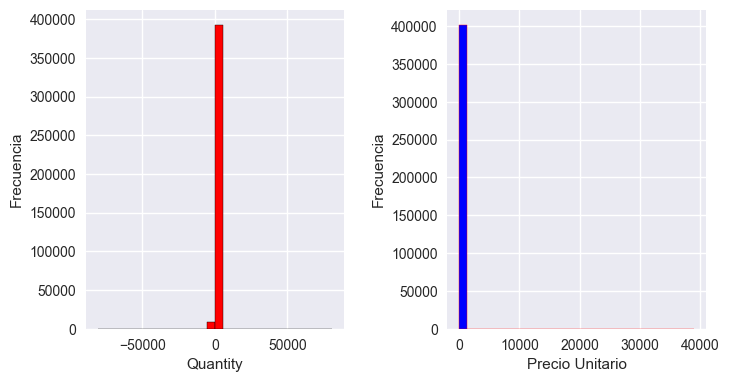

In [23]:
plt.style.use('seaborn')
fig = plt.figure(dpi=100)
plt.subplots_adjust(top = 0.59, bottom=0.01, hspace=1.5, wspace=0.4)

ax1 = fig.add_subplot(1,2,1)
ax1=df['Quantity'].hist(bins = 30,edgecolor='black',color="red")
plt.ticklabel_format(useOffset=False, style='plain')
ax1.set_xlabel('Quantity')
ax1.set_ylabel("Frecuencia")

ax2=fig.add_subplot(1,2,2)
ax2=df['UnitPrice'].hist(bins = 30,edgecolor='red',color="blue")
plt.ticklabel_format(useOffset=False, style='plain')
ax2.set_xlabel("Precio Unitario")
ax2.set_ylabel("Frecuencia")

# Gráfico 2: "Top 20 mejores Clientes y paises"

In [24]:
best_client=df.groupby("CustomerID")["Valor_Total"].sum().sort_values(ascending=False).head(20)
best_client

CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187322.17
14911.0    132458.73
12415.0    123725.45
14156.0    113214.59
17511.0     88125.38
16684.0     65892.08
13694.0     62690.54
15311.0     59284.19
13089.0     57322.13
14096.0     57120.91
15061.0     54228.74
16029.0     53168.69
17949.0     52750.84
15769.0     51823.72
14298.0     50862.44
14088.0     50415.49
17841.0     39869.05
13798.0     36352.87
Name: Valor_Total, dtype: float64

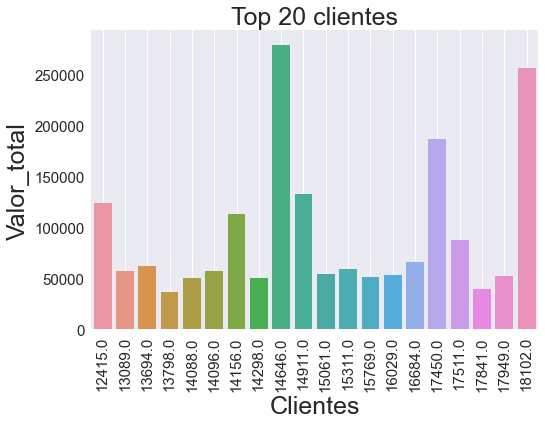

In [25]:
sns.barplot(best_client.index, best_client.values);
plt.grid();
plt.xlabel("Clientes",fontsize = 25)
plt.ylabel("Valor_total",fontsize = 25)
plt.title("Top 20 clientes",fontsize = 25)
plt.xticks(rotation = 90);
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);

In [26]:
devol_client=df.groupby("CustomerID")["Valor_Total"].sum().sort_values(ascending=True).head(20)
devol_client

CustomerID
17448.0   -4287.63
15369.0   -1592.49
14213.0   -1192.20
17603.0   -1165.30
12503.0   -1126.00
15823.0    -840.76
13154.0    -611.86
15802.0    -451.42
16252.0    -295.09
12666.0    -227.44
17307.0    -152.64
17548.0    -141.48
15728.0    -134.80
17065.0    -112.35
13958.0    -102.45
13829.0    -102.00
16546.0     -95.93
15638.0     -94.00
13672.0     -71.46
18256.0     -50.10
Name: Valor_Total, dtype: float64

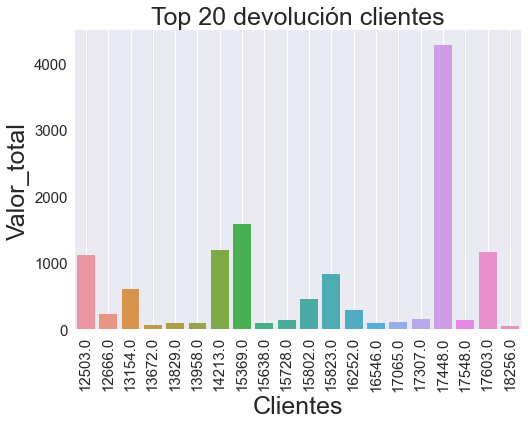

In [27]:
sns.barplot(devol_client.index, (devol_client.abs()));
plt.grid();
plt.xlabel("Clientes",fontsize = 25)
plt.ylabel("Valor_total",fontsize = 25)
plt.title("Top 20 devolución clientes",fontsize = 25)
plt.xticks(rotation = 90);
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);

#  Gráfico 3: "Top 10 paises con mas clientes e Ingresos"

In [28]:
df[["CustomerID"]].value_counts()

CustomerID
17841.0       7812
14911.0       5898
14096.0       5128
12748.0       4459
14606.0       2759
              ... 
16323.0          1
13302.0          1
16428.0          1
13270.0          1
13307.0          1
Length: 4372, dtype: int64

In [29]:
clientxpais=df.groupby("Country")["CustomerID"].nunique().sort_values(ascending=False).head(10)
clientxpais

Country
United Kingdom    3950
Germany             95
France              87
Spain               31
Belgium             25
Switzerland         21
Portugal            19
Italy               15
Finland             12
Austria             11
Name: CustomerID, dtype: int64

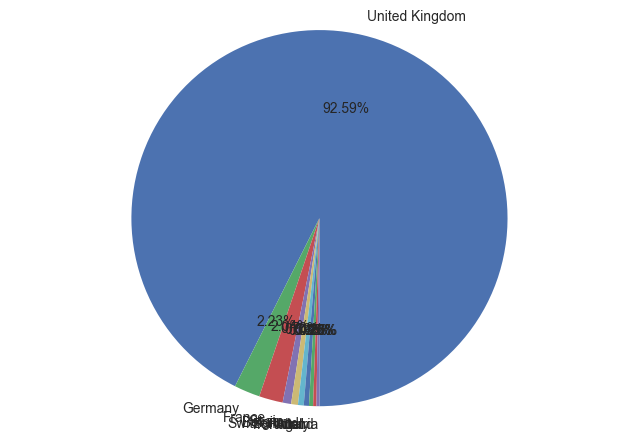

In [30]:
import matplotlib.pyplot as plt

#Gráfico de torta; cortes ordenados y gráficados contra reloj.
size = clientxpais.values
etiquetas = clientxpais.index
#explotar = [0, 0, 0.1, 0] #sirve para destacar alguna porcion. El valor es cuanto se separa de la torta.

fig1 = plt.figure(dpi=100)
ax1 = fig1.add_subplot(1,1,1) 

ax1.pie(size, labels=etiquetas, autopct="%.2f%%", shadow = False, startangle=-90)
# autopct = porcentaje automático; shadow = grafico con sombra; startangle = ángulo de inicio
# %.2f%% formato de decimal, viene del lenguaje C. Sí, python está escrito en C.

ax1.axis("equal") #asegura proporcion igualitaria, vale decir, suma de porcentajes 100% (círculo)

plt.show()

In [31]:
best_country=df.groupby("Country")["Valor_Total"].sum().sort_values(ascending=False).head(10)
best_country

Country
United Kingdom    6747156.154
Netherlands        284661.540
EIRE               250001.780
Germany            221509.470
France             196626.050
Australia          137009.770
Switzerland         55739.400
Spain               54756.030
Belgium             40910.960
Sweden              36585.410
Name: Valor_Total, dtype: float64

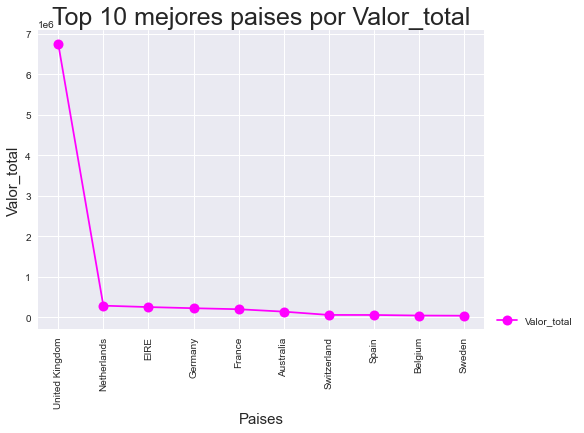

In [32]:
plt.plot(best_country.index,best_country.values, label = "Valor_total",c = 'magenta', marker = '.', markersize = 20);
plt.legend(loc=(1.02,0))
plt.xlabel("Paises",fontsize=15);
plt.ylabel("Valor_total",fontsize=15);
plt.title("Top 10 mejores paises por Valor_total",fontsize=25);  
plt.xticks(rotation = 90);

# Creando nueva data con solo Clientes Unicos

In [33]:
max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [34]:
df['Diff'] = max_date - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Hour,Day,WeekDay,WeekDayCase,DayPart,Valor_Total,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,8,1,Wednesday,WeekDay,Morning,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,8,1,Wednesday,WeekDay,Morning,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,8,1,Wednesday,WeekDay,Morning,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,8,1,Wednesday,WeekDay,Morning,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,8,1,Wednesday,WeekDay,Morning,20.34,373 days 04:24:00


In [35]:
datedifxcliente = df.groupby('CustomerID')['Diff'].min()
datedifxcliente= datedifxcliente.reset_index()
datedifxcliente.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [36]:
datedifxcliente['Diff'] = datedifxcliente['Diff'].dt.days
datedifxcliente.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [37]:
ingresoxcliente = df.groupby('CustomerID')['Valor_Total'].sum()
ingresoxcliente = ingresoxcliente.reset_index()
ingresoxcliente.head()

,CustomerID,Valor_Total
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [38]:
facturaxcliente = df.groupby('CustomerID')['InvoiceNo'].count()
facturaxcliente = facturaxcliente.reset_index()
facturaxcliente.columns = ['CustomerID', 'Frequency']
facturaxcliente.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [39]:
df2 = pd.merge(ingresoxcliente, facturaxcliente, on='CustomerID', how='inner')
df2.head()

,CustomerID,Valor_Total,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [40]:
df2 = pd.merge(df2, datedifxcliente, on='CustomerID', how='inner')
df2.columns = ['CustomerID', 'ingresoxcliente', 'facturaxcliente', 'antiguedadcliente']
df2.head()

,CustomerID,ingresoxcliente,facturaxcliente,antiguedadcliente
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [41]:
df2["Frecuencia"]=df2["antiguedadcliente"]/df2["facturaxcliente"]

In [42]:
df2.head()

,CustomerID,ingresoxcliente,facturaxcliente,antiguedadcliente,Frecuencia
0,12346.0,0.00,2,325,162.500000
1,12347.0,4310.00,182,1,0.005495
2,12348.0,1797.24,31,74,2.387097
3,12349.0,1757.55,73,18,0.246575
4,12350.0,334.40,17,309,18.176471


In [43]:
df2.to_csv("Proyecto2_final.csv",index=False)

# KMEANS

In [44]:
X=df2.drop(columns="CustomerID")

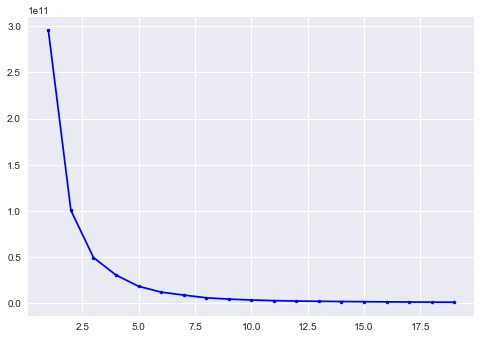

In [45]:
score = []
k_clusters = range(1,20)
for k in k_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score.append(-kmeans.score(X))
    

plt.plot(k_clusters, score,'b.-')

In [46]:
from sklearn.cluster import KMeans

k = 7
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

y_pred = kmeans.predict(X)

In [47]:
df2["clase"]=y_pred

In [48]:
conteo=[]
aux=0
for j in range (0,7):
    for i in range (0,len(y_pred)):
        if (y_pred[i]==j):
            aux=aux+1
    conteo.append(aux)
    aux=0
print(conteo)

[3891, 1, 12, 422, 4, 2, 40]


In [49]:
km=[0,1,2,3,4,5,6]

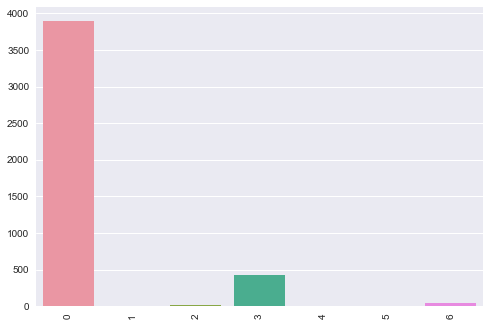

In [50]:
#No supervisado, no hay target
sns.barplot(x = km, y = conteo);
plt.xticks(rotation = 90);

In [51]:
df3 = df2.loc[~((df2['clase']==5)|(df2['clase']==6)|(df2['clase']==1)|(df2['clase']==2)|(df2['clase']==4)),:]
df3['clase'].value_counts()

0    3891
3     422
Name: clase, dtype: int64

In [52]:
filtro_0=df3["clase"]==0
filtro_0=df3[filtro_0]
filtro_0.sort_values("ingresoxcliente",ascending=False)

,CustomerID,ingresoxcliente,facturaxcliente,antiguedadcliente,Frecuencia,clase
1195,13952.0,3246.091,138,210,1.521739,0
2534,15764.0,3245.470,188,80,0.425532,0
2425,15622.0,3224.530,214,2,0.009346,0
1143,13880.0,3219.770,165,20,0.121212,0
218,12613.0,3218.980,163,30,0.184049,0
...,...,...,...,...,...,...
125,12503.0,-1126.000,1,337,337.000000,0
3870,17603.0,-1165.300,15,49,3.266667,0
1384,14213.0,-1192.200,5,371,74.200000,0
2236,15369.0,-1592.490,1,143,143.000000,0


In [55]:
filtro_3=df3["clase"]==3
filtro_3=df3[filtro_3]
filtro_3.sort_values("ingresoxcliente",ascending=False)

,CustomerID,ingresoxcliente,facturaxcliente,antiguedadcliente,Frecuencia,clase
276,12681.0,13677.59,646,14,0.021672,3
226,12621.0,13612.07,474,1,0.002110,3
71,12433.0,13375.87,420,0,0.000000,3
157,12540.0,13309.04,481,19,0.039501,3
106,12477.0,13117.01,308,22,0.071429,3
...,...,...,...,...,...,...
3567,17183.0,3286.91,76,7,0.092105,3
109,12480.0,3281.63,154,27,0.175325,3
47,12406.0,3280.75,108,21,0.194444,3
3963,17723.0,3276.40,10,126,12.600000,3


In [56]:
df3.to_csv("ProyectoFinal_Modelos.csv",index=False)

In [57]:
filename = "ProyectoFinal_Modelos.csv"
df3 = pd.read_csv(filename,encoding='latin1')
df3.head()

,CustomerID,ingresoxcliente,facturaxcliente,antiguedadcliente,Frecuencia,clase
0,12346.0,0.00,2,325,162.500000,0
1,12347.0,4310.00,182,1,0.005495,3
2,12348.0,1797.24,31,74,2.387097,0
3,12349.0,1757.55,73,18,0.246575,0
4,12350.0,334.40,17,309,18.176471,0


In [58]:
df3["clase"].value_counts()

0    3891
3     422
Name: clase, dtype: int64

# Modelos

* Preparando data para aplicar modelos

In [59]:
df3=df3.replace({'clase': {3: 1}})

In [60]:
df3.head(3)

,CustomerID,ingresoxcliente,facturaxcliente,antiguedadcliente,Frecuencia,clase
0,12346.0,0.00,2,325,162.500000,0
1,12347.0,4310.00,182,1,0.005495,1
2,12348.0,1797.24,31,74,2.387097,0


In [61]:
#Desbalanceo de clase, aplicar metrica Recall
df3["clase"].value_counts()

0    3891
1     422
Name: clase, dtype: int64

In [62]:
X=df3.drop(columns=["CustomerID","clase"])
y=df3["clase"]

In [63]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5)

In [64]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val =scaler.transform(X_val)

* KNN

In [65]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
validacion = knn.predict(X_test)
recall=recall_score(y_test, validacion, average="macro")

In [66]:
k_range = list(range(1, 5))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=2,scoring="recall", return_train_score=False,verbose=1)
grid.fit(X_train, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


GridSearchCV(cv=2, estimator=KNeighborsClassifier(n_neighbors=2),
             param_grid={'n_neighbors': [1, 2, 3, 4]}, scoring='recall',
             verbose=1)

In [67]:
cvres = grid.cv_results_
print(cvres['mean_test_score'], cvres['params'])

[0.96258503 0.91836735 0.95578231 0.92857143] [{'n_neighbors': 1}, {'n_neighbors': 2}, {'n_neighbors': 3}, {'n_neighbors': 4}]


In [68]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train) 
validacion = knn.predict(X_val)
recall=recall_score(y_val, validacion)
print(recall)

0.9538461538461539


In [69]:
predictions = knn.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       584
           1       0.98      0.95      0.97        63

    accuracy                           0.99       647
   macro avg       0.99      0.98      0.98       647
weighted avg       0.99      0.99      0.99       647



In [70]:
def plotCMa(cma,labels):
    cma = cma/cma.sum(axis=1).reshape(-1,1)
    f= plt.figure(figsize=(16, 10))
    plt.matshow(cma, fignum=f.number)
    plt.clim(0, 1)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Confusion matrix", fontsize=20)
    plt.xticks(range(len(labels)), [f"{label} (Etiqueta)" for label in labels], fontsize=16)
    plt.yticks(range(len(labels)), [f"{label} (Real)" for label in labels], fontsize=16)
    ax = plt.gca()

    for i in range(cma.shape[0]):
        for j in range(cma.shape[1]):
            value = cma[i][j]
            ax.text(j,i,"{0:.4f}".format(value),ha="center", va="center", color="b", fontsize=16)

    plt.show()

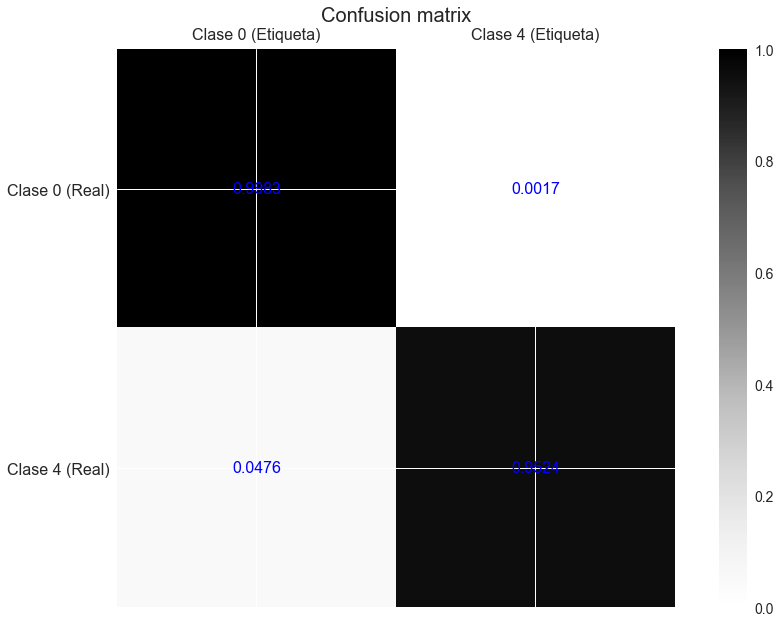

In [71]:
cm = metrics.confusion_matrix(y_test,predictions)
plotCMa(cm,['Clase 0','Clase 4'])

* Regresion logistica

In [72]:
log_reg = LogisticRegression(penalty='none') #evita el overfiting
log_reg.fit(X_train, y_train)
validacion = log_reg.predict(X_val)
recall=recall_score(y_val, validacion, average="macro")

In [73]:
param_grid = [
    {'C':[1,0.9,0.8],
    'class_weight':[{0: 0.2, 1: 0.8},{0: 0.17, 1: 0.83},{0: 0.1, 1: 0.9},{0: 0.05, 1: 0.95},{0: 0.01, 1: 0.99},{0: 0.25, 1: 0.75},{0: 0.4, 1: 0.6}],
    'penalty':['none', 'l1', 'l2','elasticnet'],
    'solver':['newton-cg', 'lbfgs', 'liblinear','saga'],
    'l1_ratio':[0,0.1]}
]


grid_search = GridSearchCV(log_reg, param_grid,cv=2,
                          return_train_score=True,scoring='recall',verbose=1)

grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 672 candidates, totalling 1344 fits


GridSearchCV(cv=2, estimator=LogisticRegression(penalty='none'),
             param_grid=[{'C': [1, 0.9, 0.8],
                          'class_weight': [{0: 0.2, 1: 0.8}, {0: 0.17, 1: 0.83},
                                           {0: 0.1, 1: 0.9}, {0: 0.05, 1: 0.95},
                                           {0: 0.01, 1: 0.99},
                                           {0: 0.25, 1: 0.75},
                                           {0: 0.4, 1: 0.6}],
                          'l1_ratio': [0, 0.1],
                          'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear',
                                     'saga']}],
             return_train_score=True, scoring='recall', verbose=1)

In [74]:
print('Mejores hiperparametros: %s' % grid_search.best_params_)

Mejores hiperparametros: {'C': 1, 'class_weight': {0: 0.2, 1: 0.8}, 'l1_ratio': 0, 'penalty': 'none', 'solver': 'newton-cg'}


In [75]:
print('Best Score: %s' % grid_search.best_score_)

Best Score: 1.0


In [76]:
log_reg = LogisticRegression(C=1,penalty='none',class_weight={0: 0.02, 1: 0.8},solver='newton-cg',l1_ratio=0)
log_reg.fit(X_train, y_train)
validacion = log_reg.predict(X_val)
recall=recall_score(y_val, validacion, average="macro")

In [77]:
predictions = log_reg.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       584
           1       1.00      1.00      1.00        63

    accuracy                           1.00       647
   macro avg       1.00      1.00      1.00       647
weighted avg       1.00      1.00      1.00       647



In [78]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
print(f'Training AUC: {roc_auc_score(y_train, log_reg.predict_proba(X_train)[:,1])}')
print(f'Testing AUC: {roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1])}')

Training AUC: 1.0
Testing AUC: 1.0


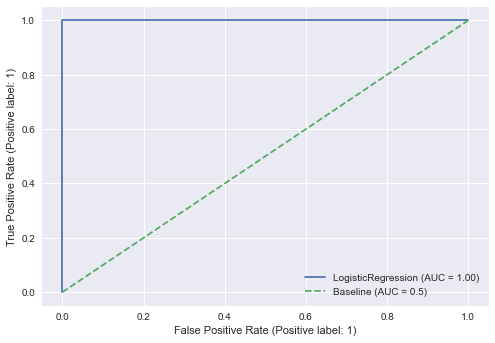

In [79]:
# Visualizar la curva ROC
plot_roc_curve(log_reg, X_train, y_train)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

* Random Forest 

In [80]:
rndf_clf = RandomForestClassifier(n_estimators=2)
rndf_clf.fit(X_train, y_train)
validacion = rndf_clf.predict(X_val)
recall=recall_score(y_val, validacion, average="macro")

In [81]:
param_grid = [{'n_estimators':[10,50,100,150,200,250]}]

grid_search = GridSearchCV(rndf_clf, param_grid, cv=2,
                          return_train_score=True)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_estimators=2),
             param_grid=[{'n_estimators': [10, 50, 100, 150, 200, 250]}],
             return_train_score=True)

In [82]:
cvres = grid_search.cv_results_
print(cvres['mean_test_score'], cvres['params'])

[0.99933753 0.99966887 0.99933753 0.99900618 0.99900618 0.99900618] [{'n_estimators': 10}, {'n_estimators': 50}, {'n_estimators': 100}, {'n_estimators': 150}, {'n_estimators': 200}, {'n_estimators': 250}]


In [83]:
rndf_clf = RandomForestClassifier(n_estimators=10)
rndf_clf.fit(X_train, y_train)
validacion = rndf_clf.predict(X_val)
recall=recall_score(y_val, validacion, average="macro")


In [84]:
predictions=rndf_clf.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       584
           1       1.00      1.00      1.00        63

    accuracy                           1.00       647
   macro avg       1.00      1.00      1.00       647
weighted avg       1.00      1.00      1.00       647



# Conclusiones

* El algoritmo Kmeans sirvio para poder agrupar mi dataframe en 6 grupos diferentes, de los cuales solo 2 se podrían denominar "relevantes", en estos 2 grupos relevantes podemos ver que el algoritmo clasifica a algunos como "Clientes Premium" (grupo 3)  y otros como "Clientes Normales" (Grupo 0) 


* En base a estos 2 grupos se hizo un analisis predictivo con 3 modelos categoricos distintos, KNN, Regresión Logística y Random Forest.


* Se pueden observar que a pesar del desbalanceo de clase, el recall y la precisión en los 3 modelos es casi 100% de no ser por el KNN que arroja 0.95 de recall en el grupo 1, es decir, que cualquiera de estos 3 modelos me podría indicar a cual de estos 2 grupos entraria un nuevo dato segun sus caracteristicas. 